In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\tsd95\CSV Files\Model\CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


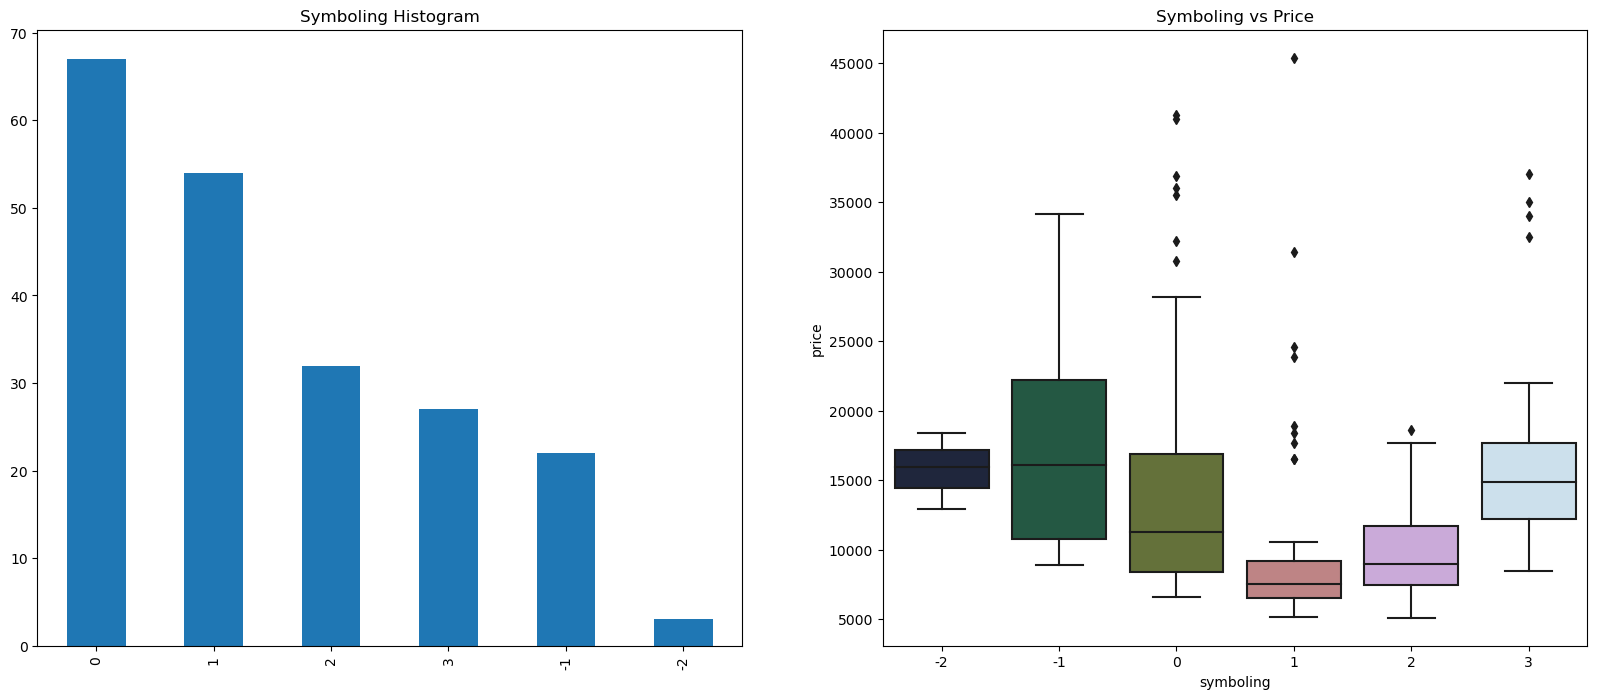

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
df['symboling'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

- It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling

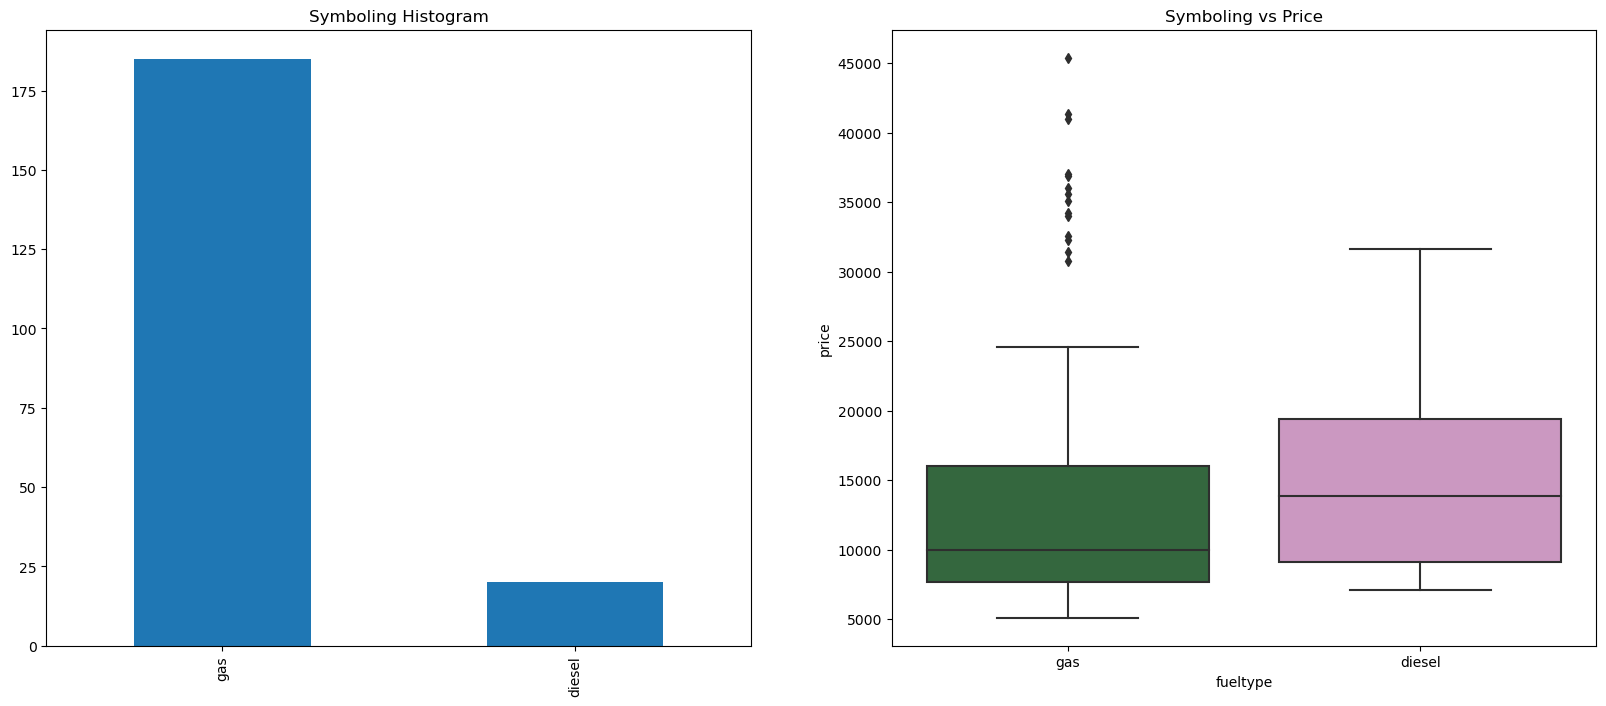

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
df['fueltype'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.fueltype, y=df.price, palette=("cubehelix"))

plt.show()

- Number of gas fueled cars are more than diesel.

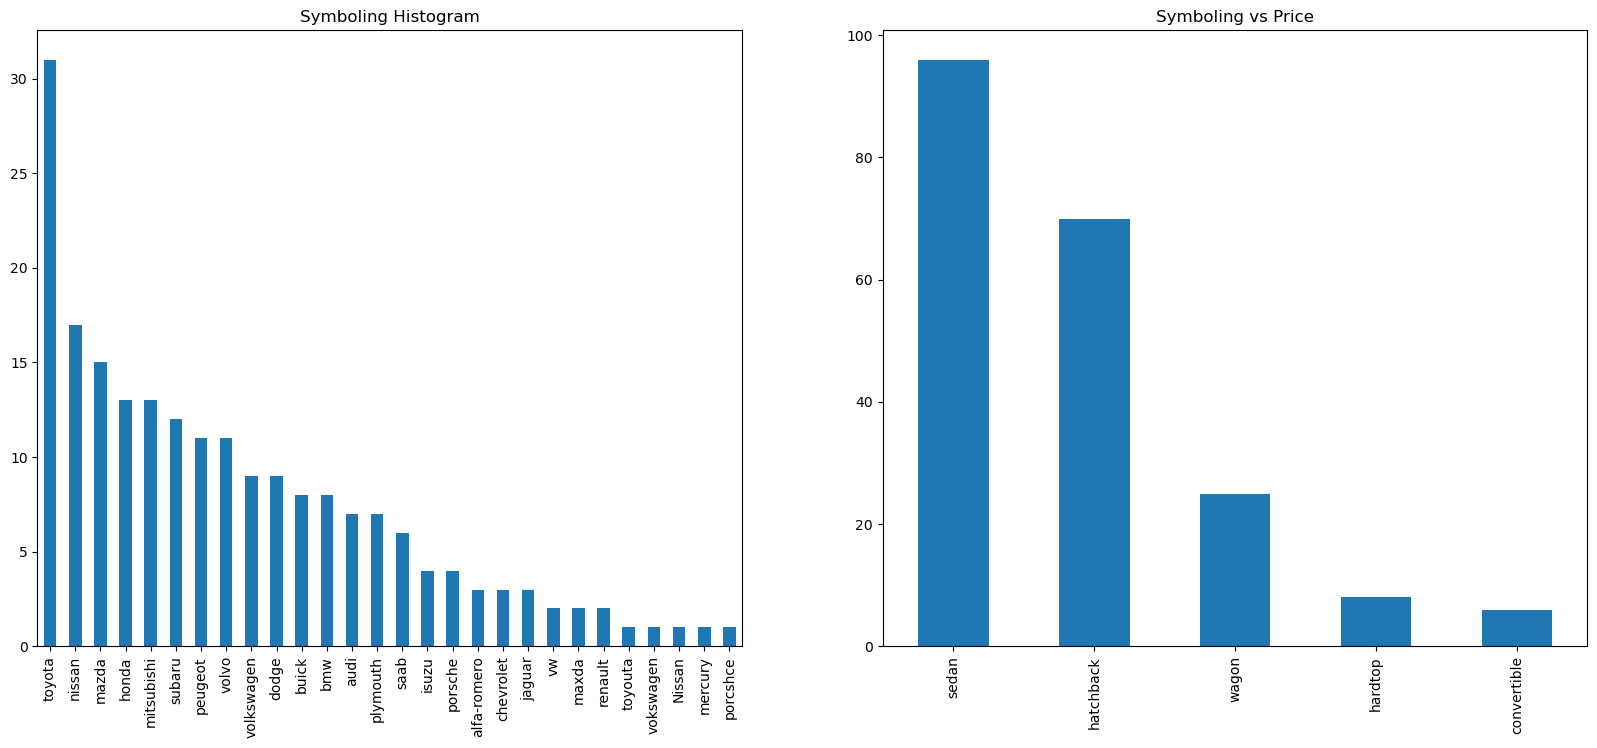

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
df['CompanyName'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
df['carbody'].value_counts().plot(kind='bar')

plt.show()

- Toyota seemed to be favored car company.
- sedan is the top car type prefered.

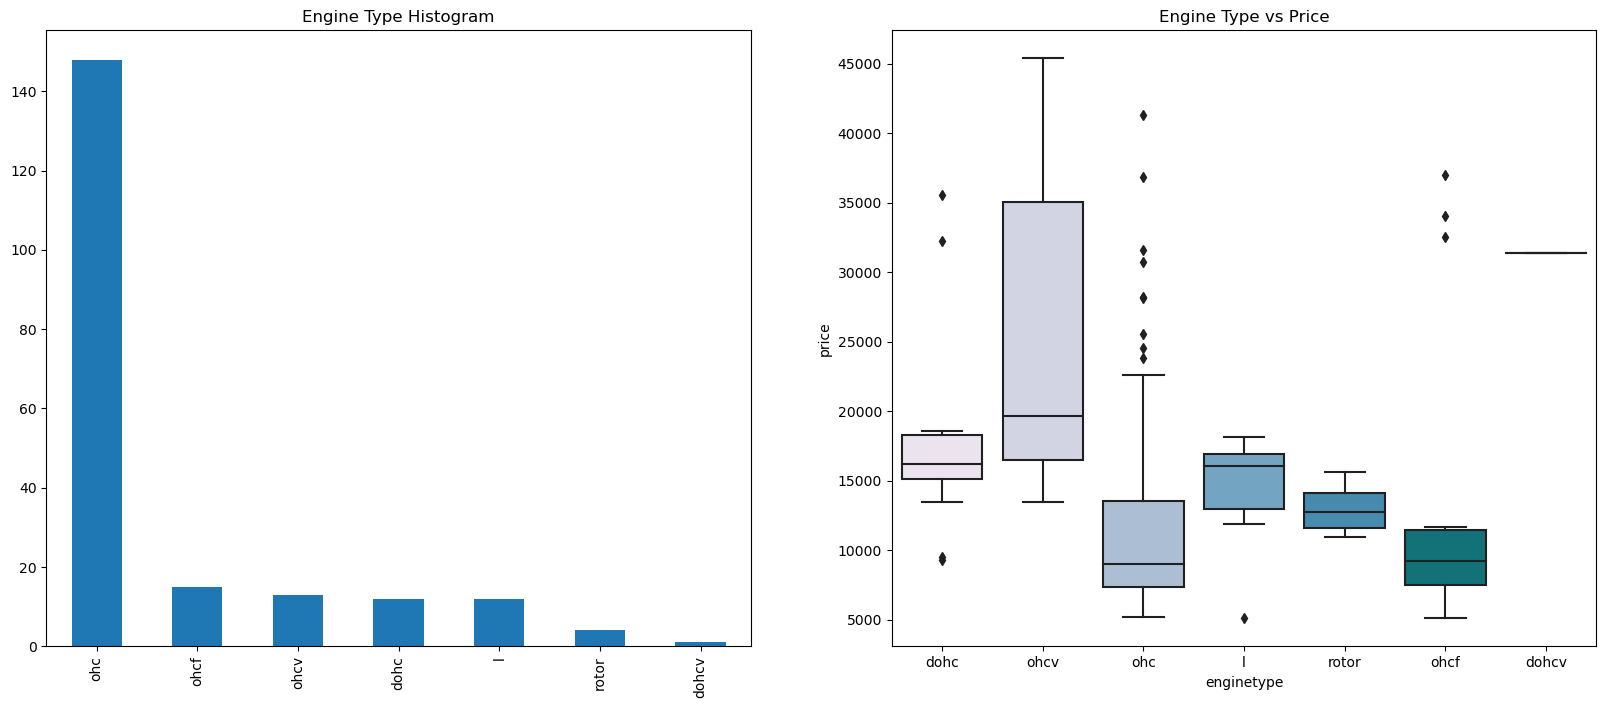

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
df['enginetype'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

- ohc Engine type seems to be most favored type.

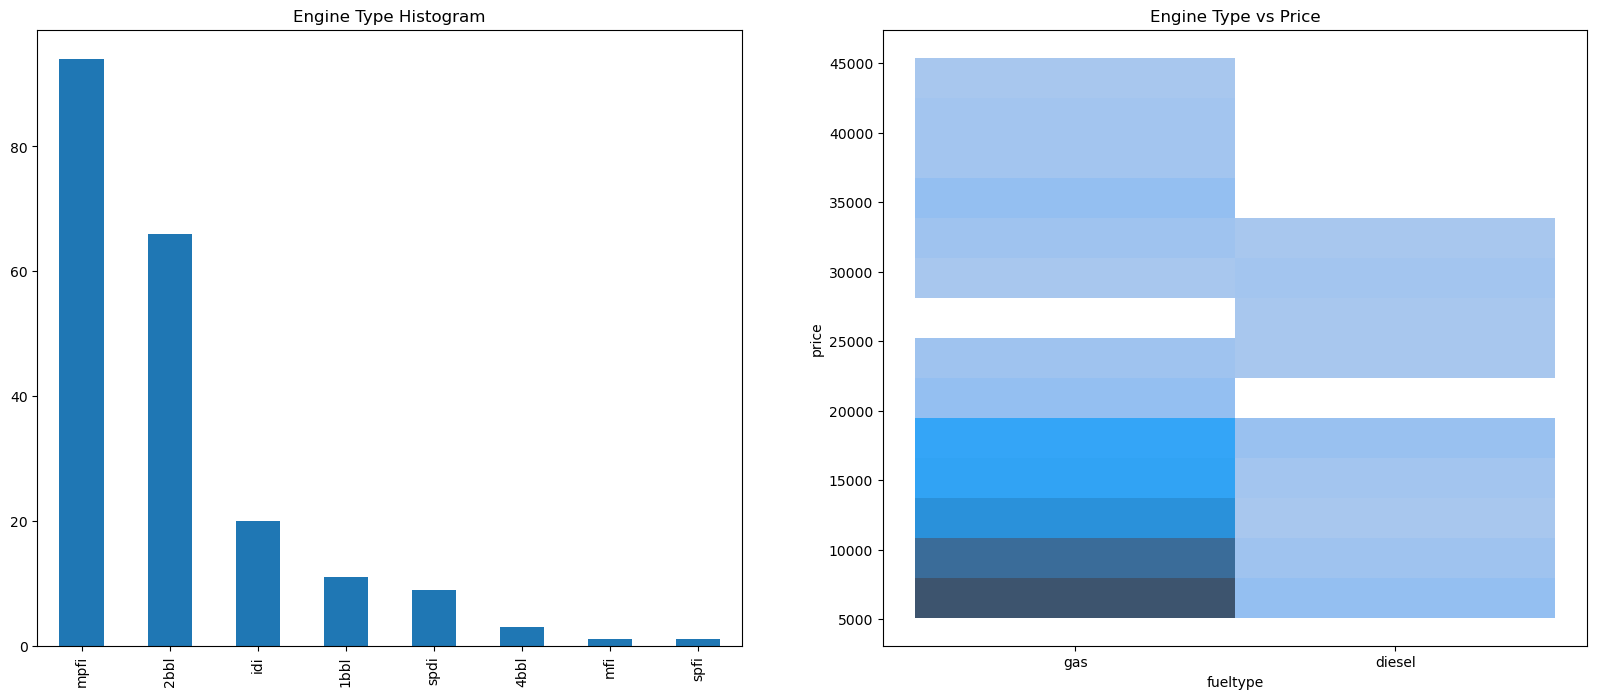

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
df['fuelsystem'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.histplot(x=df.fueltype, y=df.price)

plt.show()

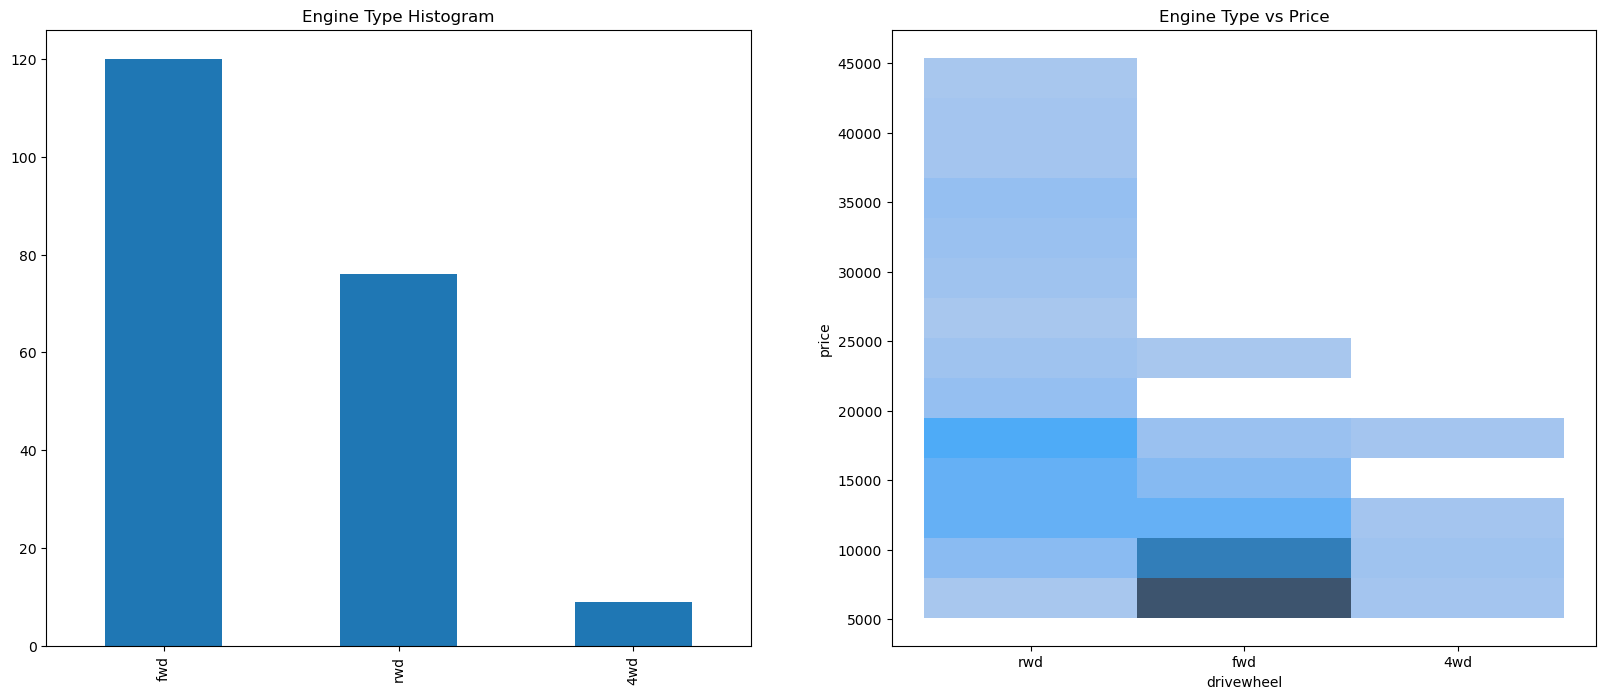

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
df['drivewheel'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.histplot(x=df.drivewheel, y=df.price)

plt.show()

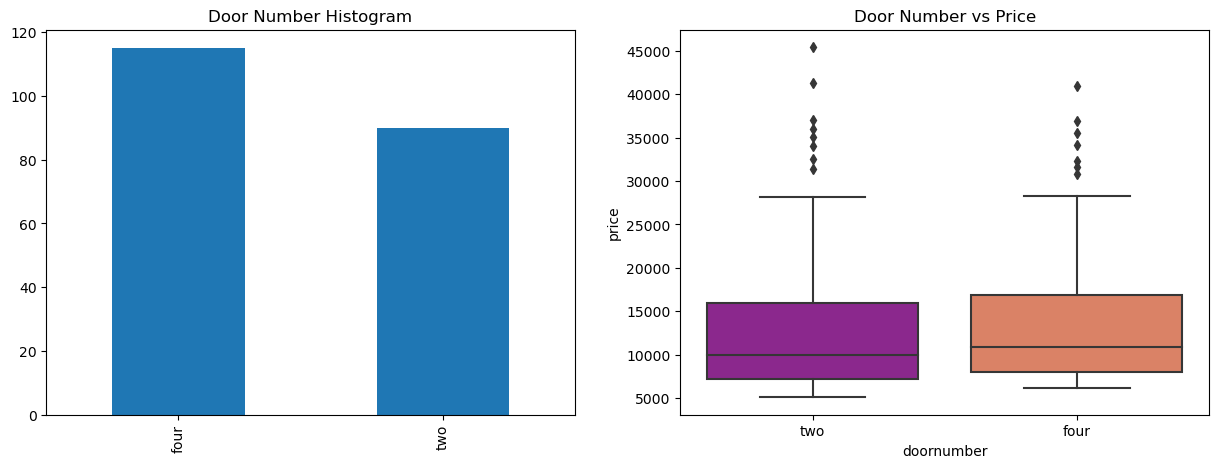

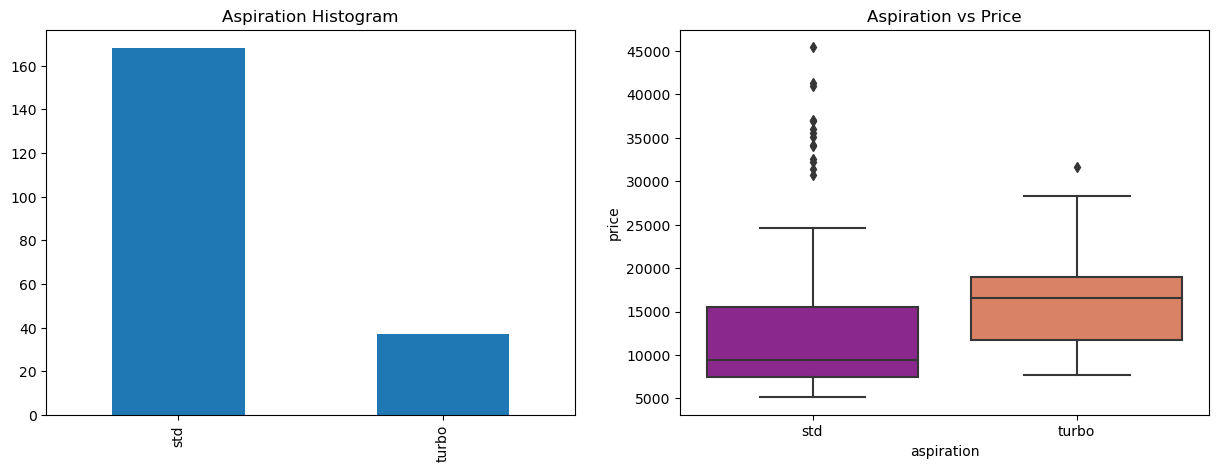

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
df['doornumber'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
df['aspiration'].value_counts().plot(kind='bar')


plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

- doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

In [15]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [16]:
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45


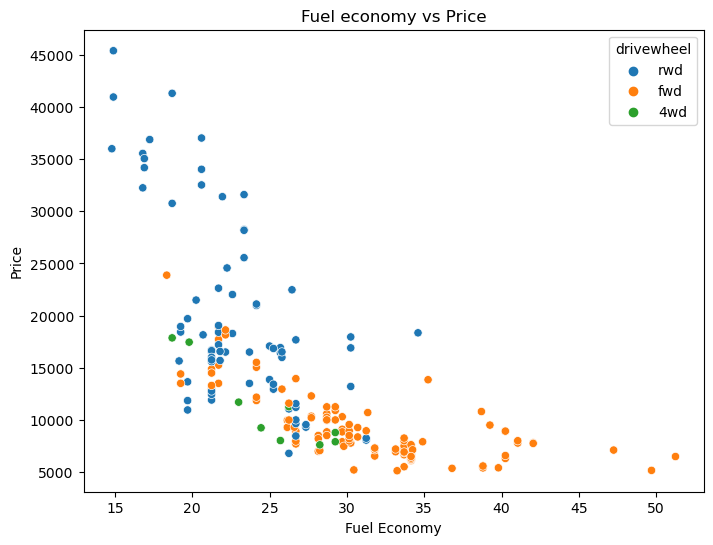

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

- fueleconomy has an obvios negative correlation with price and is significant.

<Axes: >

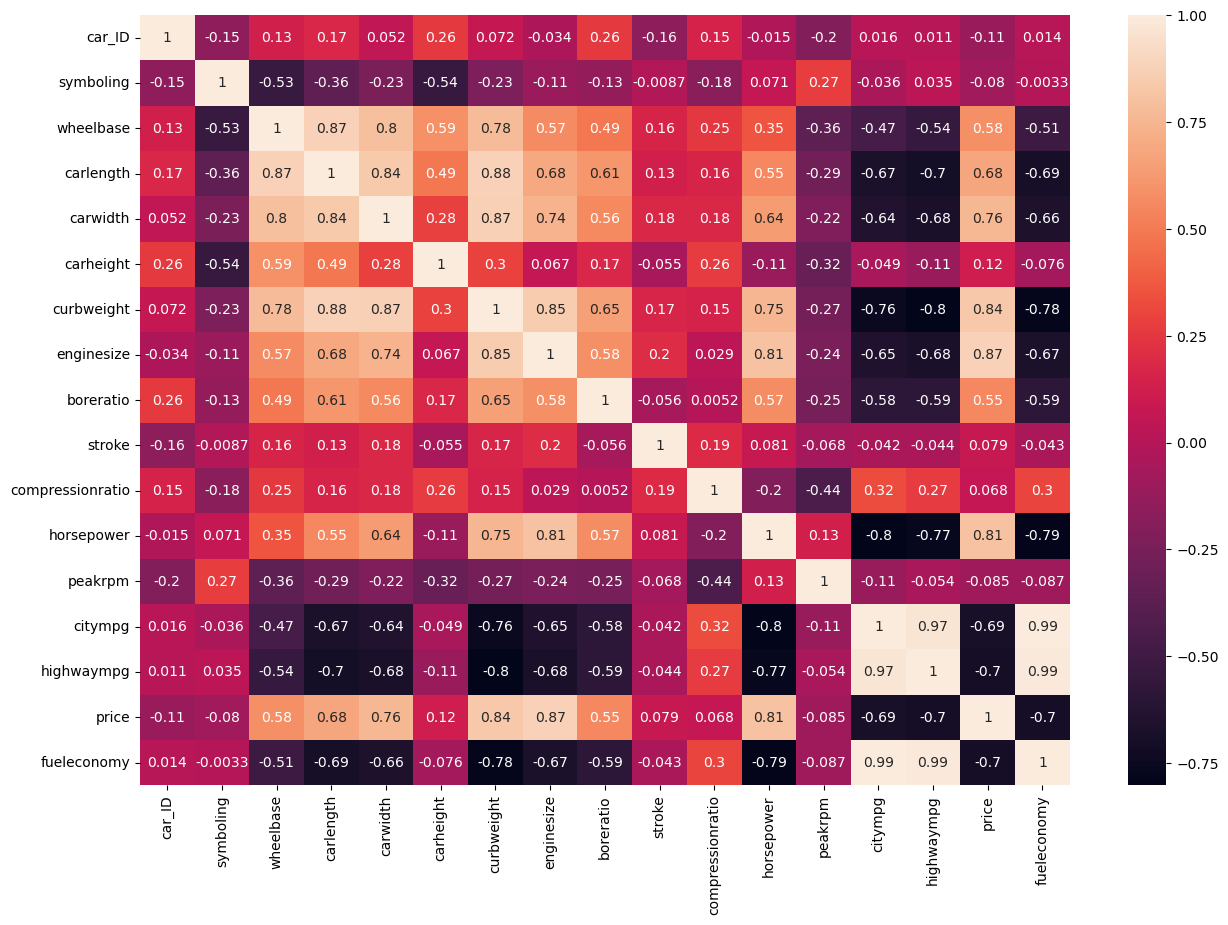

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [19]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [20]:
df.drop(['car_ID', 'symboling', 'CompanyName','doornumber', 'enginelocation', 'carlength', 'carwidth', 'carheight','fuelsystem', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','fueleconomy'],axis=1,inplace=True)

In [21]:
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,price
0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,13495.0
1,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,16500.0
2,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,16500.0
3,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,13950.0
4,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,17450.0


In [22]:
e = df[[col for col in df.columns if col in ['fueltype', 'aspiration', 'carbody', 'drivewheel','enginetype', 'cylindernumber']]]

In [23]:
e

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,gas,std,convertible,rwd,dohc,four
1,gas,std,convertible,rwd,dohc,four
2,gas,std,hatchback,rwd,ohcv,six
3,gas,std,sedan,fwd,ohc,four
4,gas,std,sedan,4wd,ohc,five
...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four
201,gas,turbo,sedan,rwd,ohc,four
202,gas,std,sedan,rwd,ohcv,six
203,diesel,turbo,sedan,rwd,ohc,six


In [24]:
e['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [25]:
e['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [26]:
e['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [27]:
e['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [28]:
e['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [29]:
e['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [30]:
ob = OrdinalEncoder(categories=[['gas', 'diesel'],['std', 'turbo'],['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
                                ['rwd', 'fwd', '4wd'],['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'],['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']])

In [31]:
ob.fit(e)

OrdinalEncoder(categories=[['gas', 'diesel'], ['std', 'turbo'],
                           ['convertible', 'hatchback', 'sedan', 'wagon',
                            'hardtop'],
                           ['rwd', 'fwd', '4wd'],
                           ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf',
                            'dohcv'],
                           ['four', 'six', 'five', 'three', 'twelve', 'two',
                            'eight']])

In [32]:
ob.transform(e)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1.],
       ...,
       [0., 0., 2., 0., 1., 1.],
       [1., 1., 2., 0., 2., 1.],
       [0., 1., 2., 0., 2., 0.]])

In [33]:
ee = pd.DataFrame(ob.transform(e),columns=['en_fueltype', 'en_aspiration', 'en_carbody', 'en_drivewheel','en_enginetype', 'en_cylindernumber'])

In [34]:
ee.head()

,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginetype,en_cylindernumber
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,2.0,1.0,2.0,0.0
4,0.0,0.0,2.0,2.0,2.0,2.0


In [35]:
df = pd.concat([ee,df],axis=1)

In [36]:
df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel','enginetype', 'cylindernumber'],axis=1,inplace=True)

In [37]:
df.head()

,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginetype,en_cylindernumber,wheelbase,curbweight,enginesize,boreratio,price
0,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47,13495.0
1,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47,16500.0
2,0.0,0.0,1.0,0.0,1.0,1.0,94.5,2823,152,2.68,16500.0
3,0.0,0.0,2.0,1.0,2.0,0.0,99.8,2337,109,3.19,13950.0
4,0.0,0.0,2.0,2.0,2.0,2.0,99.4,2824,136,3.19,17450.0


<Axes: >

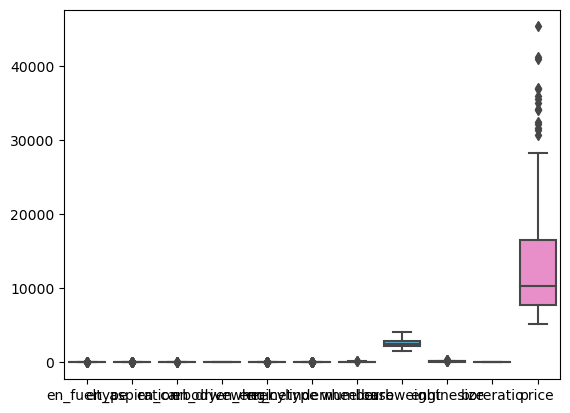

In [38]:
sns.boxplot(data=df)

In [39]:
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        q1 = df['price'].quantile(0.25)
        q3 = df['price'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
    return df

In [40]:
df = remove_outliers(df,df['price'])

In [41]:
df

,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginetype,en_cylindernumber,wheelbase,curbweight,enginesize,boreratio,price
0,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47,13495.0
1,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47,16500.0
2,0.0,0.0,1.0,0.0,1.0,1.0,94.5,2823,152,2.68,16500.0
3,0.0,0.0,2.0,1.0,2.0,0.0,99.8,2337,109,3.19,13950.0
4,0.0,0.0,2.0,2.0,2.0,2.0,99.4,2824,136,3.19,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,2.0,0.0,2.0,0.0,109.1,2952,141,3.78,16845.0
201,0.0,1.0,2.0,0.0,2.0,0.0,109.1,3049,141,3.78,19045.0
202,0.0,0.0,2.0,0.0,1.0,1.0,109.1,3012,173,3.58,21485.0
203,1.0,1.0,2.0,0.0,2.0,1.0,109.1,3217,145,3.01,22470.0


In [42]:
X = df.drop('price',axis=1)

In [43]:
X

,en_fueltype,en_aspiration,en_carbody,en_drivewheel,en_enginetype,en_cylindernumber,wheelbase,curbweight,enginesize,boreratio
0,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47
1,0.0,0.0,0.0,0.0,0.0,0.0,88.6,2548,130,3.47
2,0.0,0.0,1.0,0.0,1.0,1.0,94.5,2823,152,2.68
3,0.0,0.0,2.0,1.0,2.0,0.0,99.8,2337,109,3.19
4,0.0,0.0,2.0,2.0,2.0,2.0,99.4,2824,136,3.19
...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,2.0,0.0,2.0,0.0,109.1,2952,141,3.78
201,0.0,1.0,2.0,0.0,2.0,0.0,109.1,3049,141,3.78
202,0.0,0.0,2.0,0.0,1.0,1.0,109.1,3012,173,3.58
203,1.0,1.0,2.0,0.0,2.0,1.0,109.1,3217,145,3.01


In [44]:
y = df['price']

In [45]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 188, dtype: float64

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30)

In [47]:
print('Size_of X',X.shape)
print('Size_of y',y.shape)
print('Size_of X_train',X_train.shape)
print('Size_of X_test',X_test.shape)
print('Size_of y_train',y_train.shape)
print('Size_of y_test',y_test.shape)

Size_of X (188, 10)
Size_of y (188,)
Size_of X_train (131, 10)
Size_of X_test (57, 10)
Size_of y_train (131,)
Size_of y_test (57,)


In [48]:
lm = LinearRegression()

In [49]:
model = lm.fit(X_train,y_train)

In [50]:
ypred = model.predict(X_test)

In [51]:
ypred

array([ 7450.33276069, 13446.84911299,  7273.13137826,  6847.28465001,
       16578.10499252,  7158.93958241,  9317.41889173, 15676.61970824,
        6976.75136093,  6571.19436484, 12822.61519825,  7866.19885347,
        6700.20840642,  9678.00556294, 19549.13150778,  8234.57153474,
        7888.41417835, 11537.68413321, 15917.74804299,  6624.68659623,
        9239.79349167,  5895.16482559, 11429.56470708,  6441.34516672,
       10658.28120956, 19564.56313565, 17603.13883927, 11195.15219597,
        7559.46456397, 16566.04164553, 10827.20309446, 15698.55800843,
        8188.91205694,  6832.6973806 , 11107.4030183 , 15010.88938544,
        8997.04095617,  7553.95799065, 12920.09837779, 15977.34239735,
        9394.2807201 , 15779.59296749, 18999.57472311, 18055.87868114,
       10658.28120956, 15047.24866009, 11954.00675644, 19529.70779343,
        6510.47583281, 17437.46528403, 13591.33181356, 11636.65276309,
       15859.90741477, 15725.63955727, 11158.04537966,  6779.46510756,
      

In [52]:
model.score(X_test,y_test)

0.7524521732417524

In [53]:
model.intercept_

-18210.766265982435

In [54]:
model.coef_

array([-1551.87629464,  1812.32834182,  -234.41251112, -1155.75726025,
        -308.69609896,  1249.70476351,   150.89633308,     4.36527213,
          38.30260018,   297.71126524])

In [55]:
r2_score(y_test, ypred)

0.7524521732417524

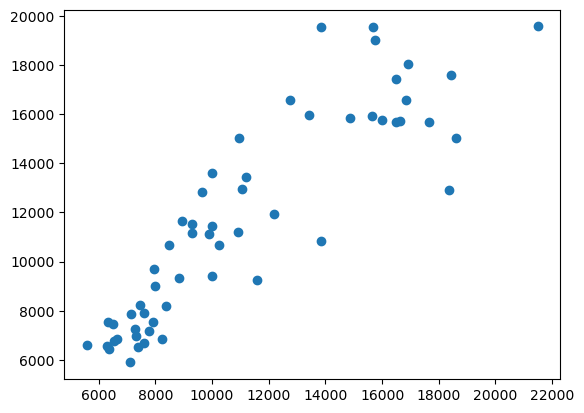

In [56]:
plt.scatter(y_test,ypred)